In [4]:
import numpy as np

In [6]:
import pandas as pd

In [10]:
data=pd.read_csv('/Users/adedoyinolayanju/Downloads/datap.csv')

In [12]:
print(data.head())

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


In [18]:
print(data.isnull().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


In [ ]:
02_exploratory_data_analysis


NameError: name 'plt' is not defined

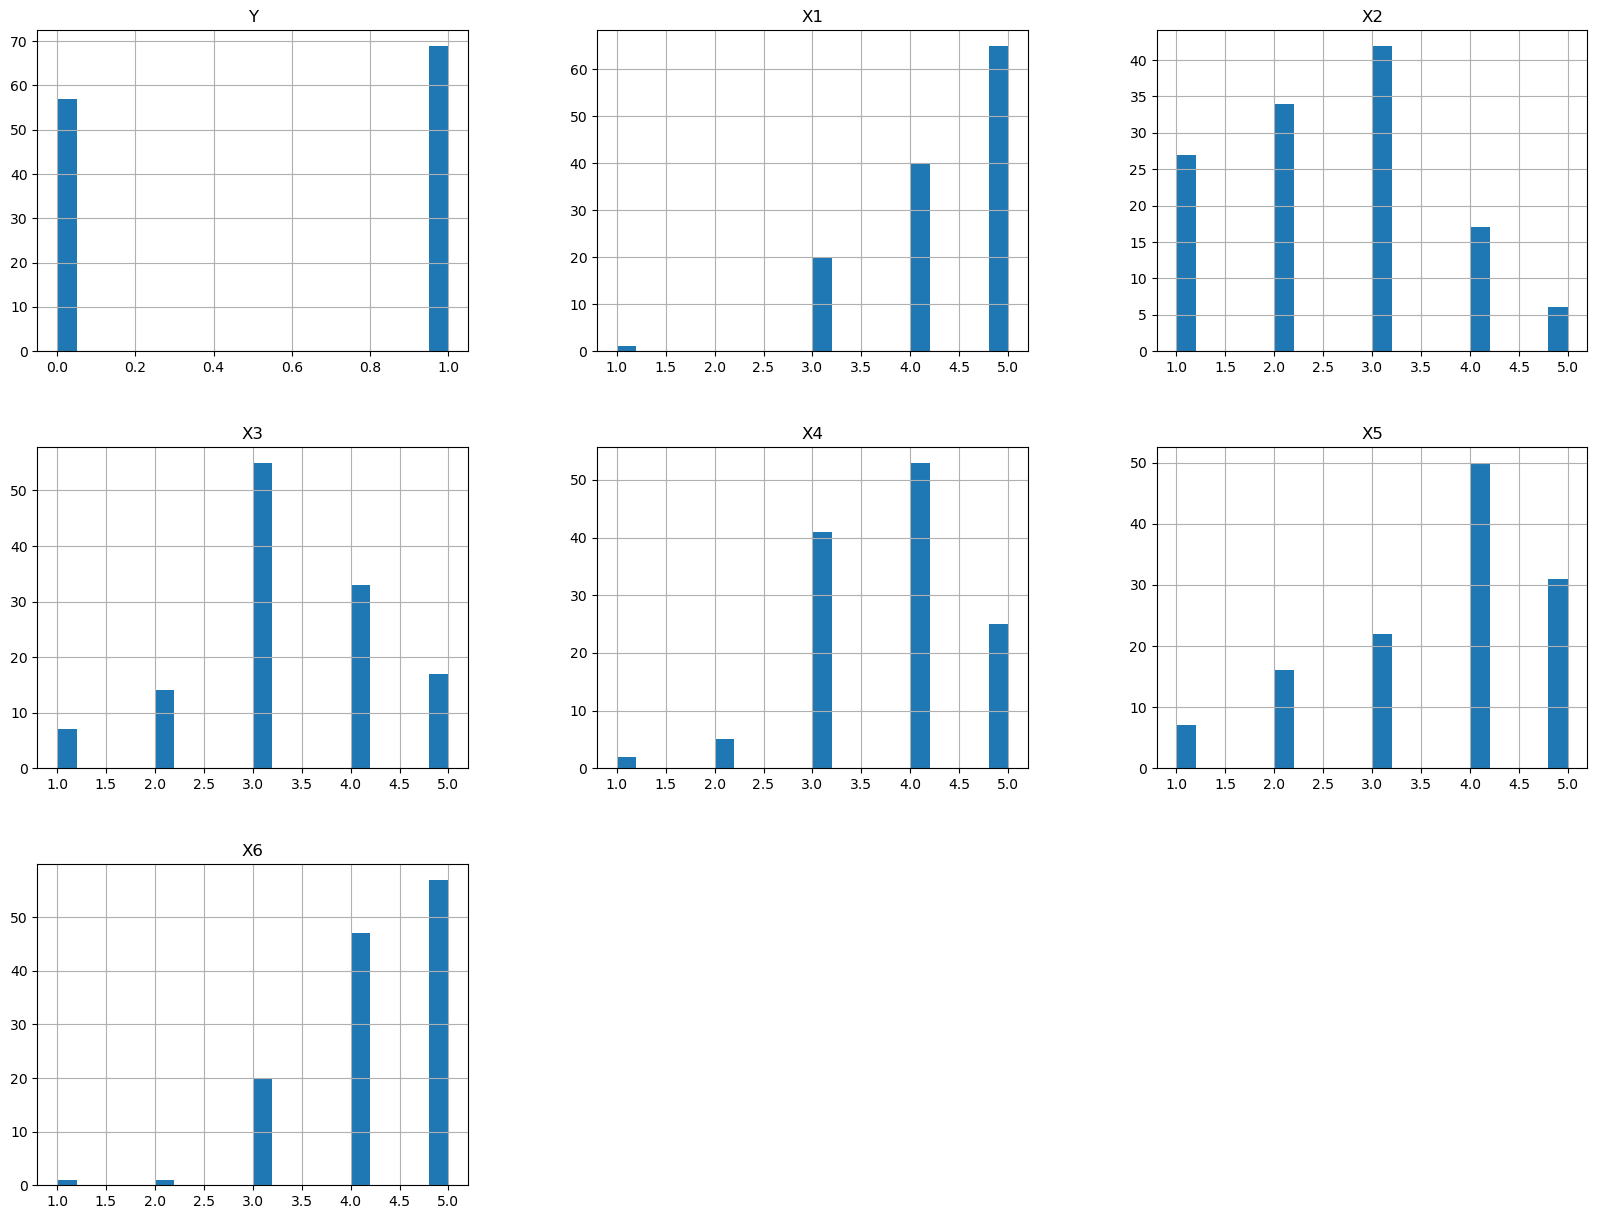

In [20]:
data.hist(bins=20, figsize=(20, 15))
plt.show()
plt.figure(figsize=(20, 15))

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
for i, column in enumerate(data.select_dtypes(include=['object']).columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

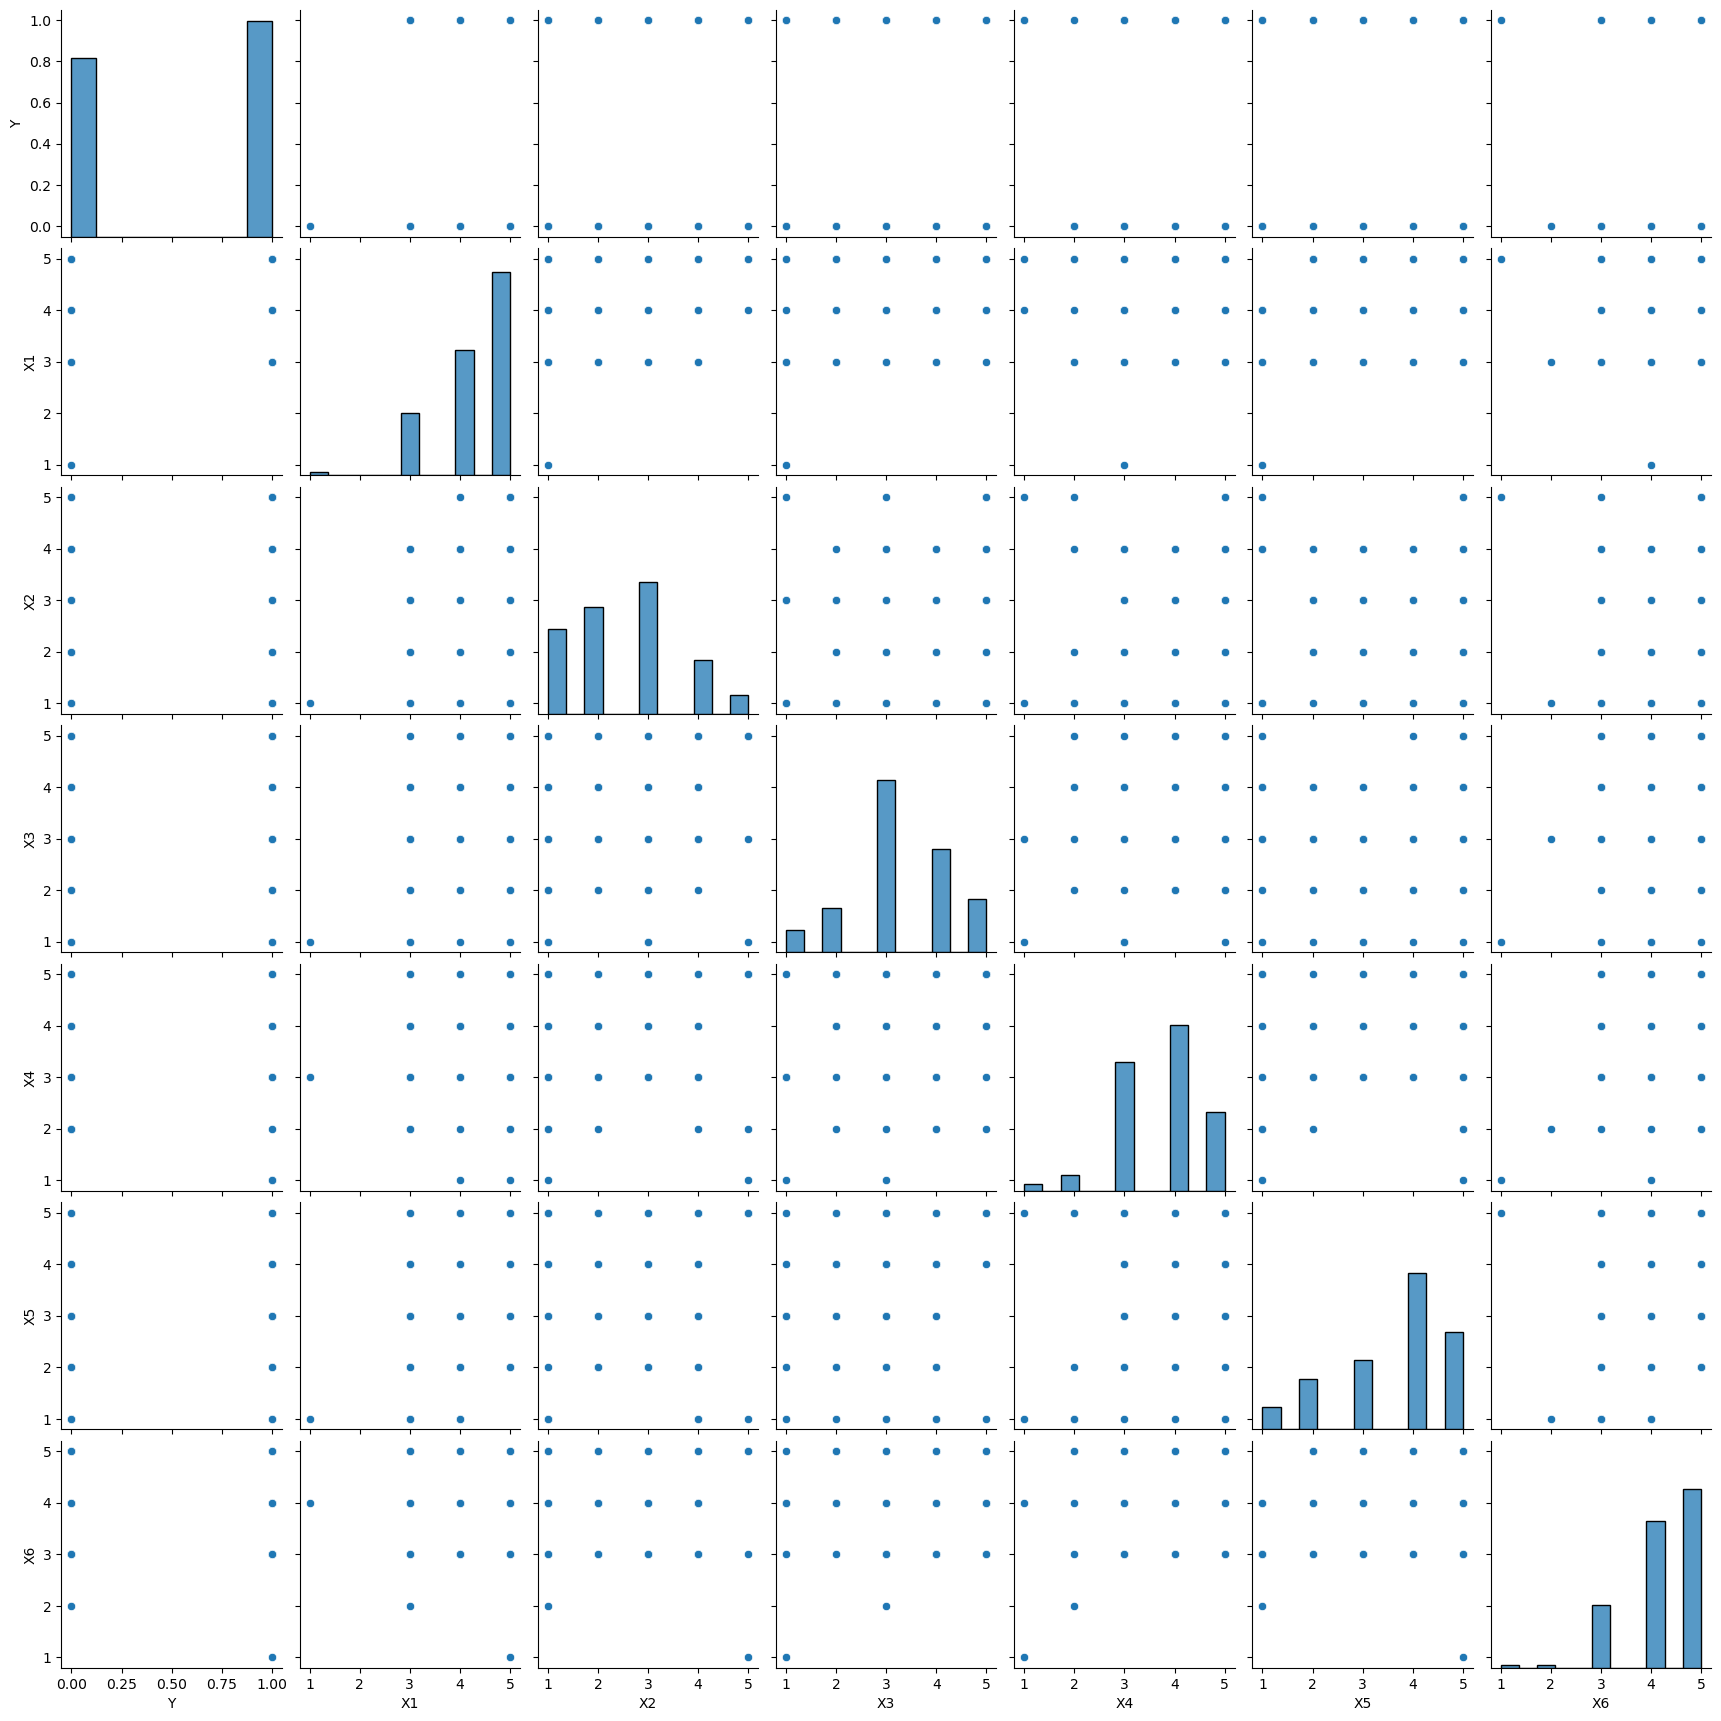

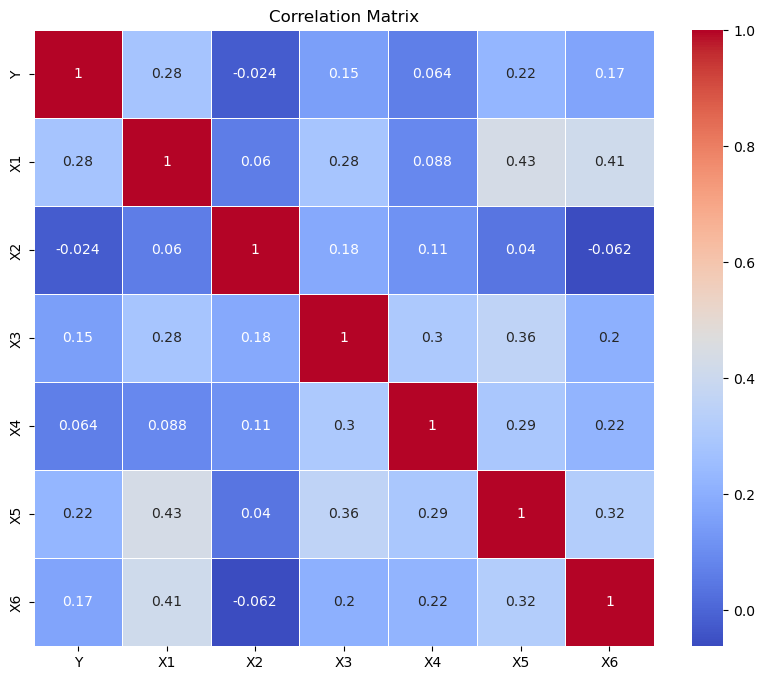

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [29]:
sns.pairplot(data.select_dtypes(include=['number']))
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(15, 10))

In [ ]:
03_feature_engineering and ml model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [45]:
X = data.drop('Y', axis=1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.640638
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                   88
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            5
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                 0.05849
Time:                        12:59:02   Log-Likelihood:                -56.376
converged:                       True   LL-Null:                       -59.879
Covariance Type:            nonrobust   LLR p-value:                    0.2203
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.6139      0.321      1.911      0.056      -0.016       1.244
X2            -0.2629      0.